<a href="https://colab.research.google.com/gist/oserikov/f430e81939ffff48cafd6377b9e67b9c/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание о векторизации текстов

В задании вам предстоит сравнить несколько методов снижения размерности
* PCA
* t-SNE

а так же попробовать осуществить тематическое моделирование методом LDA.

**Формат сдачи задания** -- указание в гуглформе ссылки на тетрадь с решением + ответ на вопросы (см. последние вопросы первой задачи) в форме. Форма появится ближе к дедлайну.

**Дедлайн** 23.59 7 октября MSK.  

ДЗ предполагает возможность получения **до 12 баллов** по десятибалльной шкале. Оценки 11 и 12 поступают в ведомость, как оценки 11 и 12.

---

Если вы уже хорошо знакомы с снижением размерности, реализуйте первую задачу, используя не Bag-of-Words векторы текстов, а эмбеддинги текстов, полученные алгоритмом на ваш выбор. 
**Если вы собираетесь решать задачу так, то, приступая, сообщите об этом @oserikov в телеграме.**

Если вы уже хорошо знакомы ещё и с векторизацией текстов эмбеддингами, напишите @oserikov для обсуждения замены первой задачи на другую.


# [6 баллов] Задача о снижении размерности




[Вот](https://drive.google.com/drive/folders/1HX5rz4UZHtbzhPguUFolOg-xm6HFc0KO?usp=sharing) корпус, однажды собранный без особенных размышлений.
Это -- корпус любительской литературы. Он был собран для забавы и непонятно, какая природа у представленных там текстов.

Вам предстоит оценить, насколько эти тексты интересны в качестве простого датасета для задачи классификации: информативны ли Bag-of-Words векторы в смысле разделения текстов по жанрам.

---

### Постановка задачи

**Задача**: взяв фанифики и два каких-то других жанра из корпуса, визуализировать их BoW-представления на плоскости.

---

Визуализацию стоит осуществлять scatter-плотом, информацию о принадлежности документа какому-то жанру стоит передавать цветом.

Количество документов, представляющих каждый жанр, стоит подобрать семплированием нужного количества элементов под доступные вычислительные ресурсы -- полный корпус точно слишком велик.

Гиперпараметры BoW-векторизатора стоит подобрать под доступные вычислительные ресурсы -- если код работает дольше часа, то стоит упростить вычислительную задачу: подобрать другие гиперпараметры векторизации или уменьшить выборку.

#### Критерии


* **1 БАЛЛ**: 
  * В выбранных документах осуществлена какая-то **стандартная предобработка текста**: удалены стоп-слова и мусорные токены (e.g. html-теги), проведена лемматизация.  
  Решение о каждой конкретной детали предобработки остаётся на усмотрение студентов: каждое нестандартное действие (e.g. отказ от лемматизации или удаление каких-то особенных токенов) стоит пояснить коротким комментарием, описывающим мотивацию.
  * Получены **Bag-of-Words векторы** документов, выбранных для исследования. 
* **1 БАЛЛ**: получена визуализация документов на плоскости **методом главных компонент** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: получена визуализация документов на плоскости методом **t-SNE** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: на полученных визуализациях **получилось передать цветом точек классы** документов; понятно, точка какого цвета относится к какому классу.


Скорее всего визуализация t-SNE и PCA заметно отличаются раскладкой точек по плоскости: один метод как будто раскладывает их вдоль двух пересекающихся прямых, за другим такого свойства скорее всего нет. Ответ на два вопроса ниже вам предстоит указать в гуглформе, сдавая задание.
* **1 БАЛЛ**: верно указано, какой метод укладывает точки примерно вдоль прямых, а какой -- нет
* **1 БАЛЛ**: предложено верное описание тому, почему у одного из методов всегда результаты располагаются вдоль некоторых прямых. 



#### Примеры кода

Использование t-SNE и PCA для визуализации векторов: [ссылка](https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans).





## В выбранных документах осуществлена какая-то стандартная предобработка текста: удалены стоп-слова и мусорные токены (e.g. html-теги), проведена лемматизация.
Решение о каждой конкретной детали предобработки остаётся на усмотрение студентов: каждое нестандартное действие (e.g. отказ от лемматизации или удаление каких-то особенных токенов) стоит пояснить коротким комментарием, описывающим мотивацию.
Получены Bag-of-Words векторы документов, выбранных для исследования.

In [1]:
### реализуйте эту функцию ранжирования
import collections
import string
import pandas as pd
import numpy as np
import re

from tqdm import tqdm
from pymorphy2 import MorphAnalyzer
from razdel import tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.patches as mpatches
import gensim
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from scipy.sparse import csc
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

morph = MorphAnalyzer()
stop = set(stopwords.words('russian') + ["a","abbr","acronym","address","area","b","base","bdo","big",
                                         "blockquote","body","br","button","caption","cite","code","col",
                                         "colgroup","dd","del","dfn","div","dl","DOCTYPE","dt","em","fieldset",
                                         "form","h1","h2","h3","h4","h5","h6","head","html","hr","i","img","input",
                                         "ins","kbd","label","legend","li","link","map","meta","noscript","object",
                                         "ol","optgroup","option","p","param","pre","q","samp","script","select",
                                         "small","span","strong","style","sub","sup","table","tbody","td","textarea",
                                         "tfoot","th","thead","title","tr","tt","ul","var"]
)


def my_preprocess(text: str):
    text = str(text)
    text = text.replace("\n", " ")
    text = text.lower()
#     text = re.sub('\S*@\S*\s?', '', text)
#     text = re.sub('\s+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokenized_text = list(tokenize(text))
    lemm = [morph.parse(i.text)[0].normal_form for i in tokenized_text]
    words = [i for i in lemm if i not in stop and not i.isdigit() and len(i) > 2]
    return " ".join(words)

In [2]:
import os

folder = "ЛюбительскиеКорпуса2.0/"
entries = os.listdir(folder)

names = []
categories = []
text = []
num_text_category = 1000
num_classes = 5
# folder_name_cat = ['Детектив', 'Пародии', 'Религия', 'Детская', 'Фэнтези']
folder_name_cat = ['Публицистика', 'Детская', 'Фанфик']


for categ_count, folder_name in enumerate(folder_name_cat):
    if categ_count >= num_classes:
        break
        
    text_count = 0
    for file in os.listdir(folder + folder_name + "/"):
        filename = folder + folder_name + "/" + file
        with open(filename, "r") as f:
            text_str = f.read()
            if 100 <= len(text_str) <= 10000:
                categories.append(folder_name)
                names.append(filename)
                text.append(text_str)
                text_count += 1
            if text_count >= num_text_category:
                break
                

In [3]:
df = pd.DataFrame(list(zip(names, categories, text)),
                 columns=['names','categories', 'text'])

In [4]:
norm_text = []

for text in tqdm(df.text.values):
    norm_text.append(my_preprocess(text))
    
df['normalize_text'] = norm_text
df

100%|██████████| 966/966 [03:17<00:00,  4.89it/s]


,names,categories,text,normalize_text
0,ЛюбительскиеКорпуса2.0/Публицистика/chuksin_n_...,Публицистика,\n\n\n \n \n\n\n\n Куда послали Россию?\n Не о...,послать россия откроить америка сказать любой ...
1,ЛюбительскиеКорпуса2.0/Публицистика/izgarshew_...,Публицистика,\nХранить на самом сайте этот список не совсем...,хранить самый сайт список надёжно поэтому пуст...
2,ЛюбительскиеКорпуса2.0/Публицистика/demonstude...,Публицистика,\n\n\n\n\n\n \n \n\n\n\n \tДля чего нам нужны ...,нужный топ выделять иной произведение рассказ ...
3,ЛюбительскиеКорпуса2.0/Публицистика/korotin_w_...,Публицистика,"\n Жила-была (банально, а что поделаешь) учите...",жилабыть банально поделать учительница русский...
4,ЛюбительскиеКорпуса2.0/Публицистика/gera_gpara...,Публицистика,\n\n\n \n \n\n\n\n Это очень достойно и значим...,это очень достойно значимый парад победа красн...
...,...,...,...,...
961,ЛюбительскиеКорпуса2.0/Фанфик/torperwyjklipp.txt,Фанфик,"\n\nВагон метро,&#8237; &#8236;В&#8237; &#823...",вагон метро угол вагон угловой диванчик дремат...
962,ЛюбительскиеКорпуса2.0/Фанфик/kubrin_m_sdj.txt,Фанфик,"\nОщущения перед попаданием я запомнил плохо, ...",ощущение попадание запомнить плохо простой при...
963,ЛюбительскиеКорпуса2.0/Фанфик/palitko_s_ahpama...,Фанфик,"\n\n\n\n \n \n\n\n\n Вот её цель - искорка, ко...",цель искорка который выдернуть река забвение т...
964,ЛюбительскиеКорпуса2.0/Фанфик/lunin_a_wnewed9.txt,Фанфик,"\n Неведение грязнокровок\n- Грязнокровка, - п...",неведение грязнокровка грязнокровка презритель...


In [5]:
vectorizer = TfidfVectorizer(analyzer=str.split,
    min_df = 5,
    max_df = 0.95,
    max_features = 15000,
)

df_vecs = vectorizer.fit_transform(df.text.values)

## получена визуализация документов на плоскости методом главных компонент снижения размерности Bag-of-Words векторов.
## получена визуализация документов на плоскости методом t-SNE снижения размерности Bag-of-Words векторов.
## на полученных визуализациях получилось передать цветом точек классы документов; понятно, точка какого цвета относится к какому классу.

In [6]:
df.shape

(966, 4)

In [7]:
df_vecs.shape

(966, 11974)

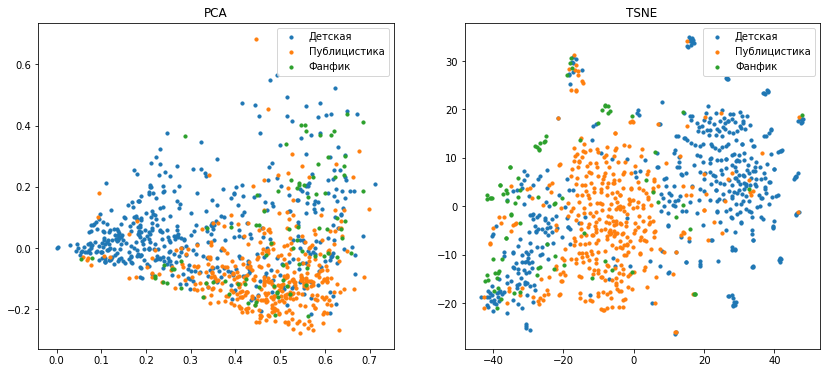

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def plot_tsne_pca(data_df, labels, categories):
    pca = TruncatedSVD(random_state=42).fit_transform(data_df)
    tsne = TSNE(random_state=42).fit_transform(TruncatedSVD(n_components=50).fit_transform(data_df))
    
    categories = list(set(categories))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    idx = np.random.choice(range(pca.shape[0]), size=len(labels), replace=False)
    
    f, ax = plt.subplots(1, 2, figsize=(16, 7))
    ax[0].set_title('PCA')
    ax[1].set_title('TSNE')
    
    for cat, col in zip(categories, colors):
        indices = df.categories == cat
        ax[0].scatter(pca[indices, 0], pca[indices, 1],
                     c=col,
                     s=10)
        ax[1].scatter(tsne[indices, 0], tsne[indices, 1],
                     c=col,
                     s=10)
        
    ax[0].legend(categories)
    ax[1].legend(categories)


cat_ind = {cat: ind for ind, cat in enumerate(set(df.categories))}
category_to_ind = []
for i in df.categories.values:
    category_to_ind.append(cat_ind[i])
# print(category_to_ind)
plot_tsne_pca(df_vecs, category_to_ind, df.categories.values)

## верно указано, какой метод укладывает точки примерно вдоль прямых, а какой -- нет

PCA метод укладывает точки вдоль прямых, а t-SNE более наглядно выделяет группы и кластеры

## предложено верное описание тому, почему у одного из методов всегда результаты располагаются вдоль некоторых прямых.

Метод главных компонент максимизирует выборочную дисперсию проекции данных, поэтому когда мы снижаем размерность до 2-ух мы получаем проекцию на две оси, по которым сохраняется максимальная дисперсия

## [6 баллов] Задача о тематическом моделировании



### об LDA




### Постановка задачи
Загрузите [коллекцию писем Х. Клинтон](https://www.kaggle.com/kaggle/hillary-clinton-emails/downloads/hillary-clinton-emails-release-2015-09-11-01-39-01.zip) с kaggle. Для скачивания может потребоваться регистрация.

Методом LDA выделите несколько тем в переписке Х. Клинтон, дайте им словесное описание. Используйте библиотеку LdaModel из gensim.

#### Критерии

* **2 БАЛЛА**: получены списки ключевых слов, не выглядящие бессмыслицей
* **2 БАЛЛА**: осуществлена визуализация библиотекой pyLDAvis
* **1 БАЛЛ**: предложено осмысленное текстовое описание большинства выделенных тем.
* **1 БАЛЛ**: проведено сравнение LDA, запущенного на CountVectorizer и TfIdfVectorizer предтавлениях одних и тех же данных. 

#### примеры кода

Пример обучения LdaModel на выдаче CountVectorizer: [ссылка](https://github.com/EricSchles/sklearn_gensim_example/blob/master/example.py)

Пример использования pyLDAvis: секция 15 [по ссылке](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

---

Для обучения *LdaModel* и её последующей визуализации потребуется словарь формата gensim. Словарь формата gensim удобно получать из сжатого csc_matrix-представления нашего векторизованного текста: как многие замечали на паре, tf-idf векторы содержат много нулей.

```python
import gensim
from scipy.sparse import csc

corpus = gensim.matutils.Sparse2Corpus(csc.csc_matrix(X))
dictionary = gensim.corpora.Dictionary.from_corpus(corpus, vocab_dict)
```

где *corpora* содержит полученное с помощью gensim представление коллекции, а *vocab_dict* — это dict, полученный после работы Vectorizer, ставящий в соответствие каждому номеру строки в матрице данных само слово в виде строки.

In [9]:
stop_words_en = stopwords.words('english')
stop_words_en.extend(['from', 'subject', 're', 'edu', 'use'])

def my_preprocess_en(text: str):
    text = str(text)
    text = text.replace("\n", " ")
    text = text.lower()
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\s+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokenized_text = list(tokenize(text))
    lemm = [morph.parse(i.text)[0].normal_form for i in tokenized_text]
    words = [i for i in lemm if i not in stop_words_en and not i.isdigit() and len(i) > 2]
    return " ".join(words)

In [10]:
# Import Dataset
df_kl = pd.read_csv('Klinton/Emails.csv')
df_kl.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [11]:
norm_text = []

for text in tqdm(df_kl.RawText.values):
    norm_text.append(my_preprocess_en(text))
    
df_kl['normalize_text'] = norm_text
df_kl.head()

100%|██████████| 7945/7945 [02:23<00:00, 55.31it/s] 


,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,normalize_text
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,unclassified department state case doc date st...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,unclassified department state case doc date st...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,unclassified department state case doc date st...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,unclassified department state case doc date st...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,unclassified department state case doc date st...


In [12]:
vectorizer = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
)
df_vecs = vectorizer.fit_transform(df_kl.normalize_text.values)

idf = vectorizer.idf_
id2word_ = dict((v, k) for k, v in vectorizer.vocabulary_.items())
word2id_ = dict((k, v) for k, v in vectorizer.vocabulary_.items())
id2word = gensim.corpora.Dictionary()
id2word.id2token = id2word_
id2word.token2id = word2id_

In [13]:
id2word

In [14]:
import gensim
from scipy.sparse import csc

corpus = gensim.matutils.Sparse2Corpus(csc.csc_matrix(df_vecs))
# dictionary = gensim.corpora.Dictionary.from_corpus(corpus, vectorizer.vocabulary)

In [15]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## получены списки ключевых слов, не выглядящие бессмыслицей

In [16]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.002*"lucky" + 0.002*"praised" + 0.002*"satellite" + 0.002*"saud" + '
  '0.002*"sao" + 0.002*"koreans" + 0.002*"appalling" + 0.002*"specifically" + '
  '0.002*"advised" + 0.002*"delivered"'),
 (1,
  '0.000*"surprising" + 0.000*"rejecting" + 0.000*"naval" + 0.000*"shipping" + '
  '0.000*"indirect" + 0.000*"kristin" + 0.000*"virus" + 0.000*"correctly" + '
  '0.000*"whitewater" + 0.000*"conscious"'),
 (2,
  '0.001*"accepting" + 0.001*"agreement" + 0.001*"sky" + 0.001*"separation" + '
  '0.001*"months" + 0.001*"stormed" + 0.001*"thursday" + 0.001*"dogs" + '
  '0.001*"stress" + 0.001*"films"'),
 (3,
  '0.001*"turkish" + 0.001*"turmoil" + 0.001*"turner" + 0.001*"turned" + '
  '0.001*"tables" + 0.001*"talbott" + 0.001*"treatment" + 0.001*"treasury" + '
  '0.001*"turning" + 0.001*"trend"'),
 (4,
  '0.002*"remarkable" + 0.002*"pennsylvania" + 0.002*"penn" + '
  '0.002*"liability" + 0.001*"legitimate" + 0.001*"lewis" + 0.001*"imports" + '
  '0.001*"cherylmill" + 0.001*"lemieux" + 0.001*

## предложено осмысленное текстовое описание большинства выделенных тем.

топик 0:
Обсуждение внешней политики (Корея, Саудовская Аравия) и того что следует избежать

топик 1:
Про флот, вирус, наследие

топик 2:
Рабочие переписки, включающие в себя соглашения, назначение встреч, разговоры о primaries, повседневные обсуждения (погоды, собак, фильмов ....) 


топик 3:
Про Сомали, Уганду и конфликты, связанные с Турцией. 

топик 4:
Обсуждения выборов и событий в штате Пенсильвания

## осуществлена визуализация библиотекой pyLDAvis

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.300784 -0.129274       1        1  40.333702
4     -0.252269 -0.215376       2        1  28.126652
3     -0.056343  0.274644       3        1  21.284590
0     -0.000652  0.062306       4        1   9.785587
1      0.008480  0.007700       5        1   0.469463, topic_info=     Category       Freq        Term      Total  loglift  logprob
5223  Default  12.000000       lucky  12.000000  30.0000  30.0000
2287  Default  23.000000  remarkable  23.000000  29.0000  29.0000
3695  Default  12.000000     praised  12.000000  28.0000  28.0000
3269  Default  12.000000   satellite  12.000000  27.0000  27.0000
2987  Default  12.000000        saud  12.000000  26.0000  26.0000
...       ...        ...         ...        ...      ...      ...
2764   Topic5   0.031684  disruption   3.797122   0.5751  -8.9340
7206   Topic5   0.031690     manning   4.272988   0.4573  -8.9338
2401   Topic5   0.031978     rejects   6.860097  -0.0071  -8.9248
1893   Topic5   0.031903     nicolas   7.674490  -0.1216  -8.9271
2455   Topic5   0.031824   expanding   6.049860   0.1138  -8.9296

[248 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1789      1  0.990457   accepting
5928      4  0.955701     accords
3870      2  0.956685      admire
3315      4  0.962346     advised
2971      4  0.946902     adviser
...     ...       ...         ...
3125      1  0.955364  undermined
5763      2  0.339004       virus
5763      3  0.678009       virus
6515      3  0.853446  whitewater
1988      3  0.956107     wouldnt

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2])

## проведено сравнение LDA, запущенного на CountVectorizer и TfIdfVectorizer предтавлениях одних и тех же данных. (Выше TF-IDF, ниже CountVectorizer)

In [18]:
vec = CountVectorizer(min_df=10, stop_words='english')
X = vec.fit_transform(df_kl.normalize_text.values)
vocab = vec.get_feature_names()

In [19]:
Lda_countvec = gensim.models.ldamodel.LdaModel(gensim.matutils.Sparse2Corpus(X.T), num_topics=5,
                                    passes=20,
                                    id2word=dict([(i, s) for i, s in enumerate(vocab)]),
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   alpha='auto',
                                   per_word_topics=True)

In [22]:
pprint(Lda_countvec.print_topics())
doc_lda = Lda_countvec[gensim.matutils.Sparse2Corpus(X.T)]

[(0,
  '0.023*"state" + 0.019*"department" + 0.018*"minister" + 0.016*"afghanistan" '
  '+ 0.015*"iran" + 0.015*"office" + 0.012*"nuclear" + 0.012*"military" + '
  '0.011*"reuters" + 0.011*"meeting"'),
 (1,
  '0.013*"said" + 0.010*"obama" + 0.010*"israel" + 0.007*"president" + '
  '0.006*"israeli" + 0.006*"clinton" + 0.006*"peace" + 0.005*"case" + '
  '0.005*"date" + 0.005*"like"'),
 (2,
  '0.051*"state" + 0.050*"department" + 0.049*"date" + 0.049*"unclassified" + '
  '0.049*"case" + 0.049*"sent" + 0.049*"doc" + 0.021*"message" + '
  '0.020*"release" + 0.018*"original"'),
 (3,
  '0.012*"state" + 0.010*"department" + 0.008*"case" + 0.008*"unclassified" + '
  '0.008*"date" + 0.008*"doc" + 0.006*"government" + 0.006*"new" + '
  '0.005*"security" + 0.005*"states"'),
 (4,
  '0.013*"said" + 0.010*"state" + 0.009*"case" + 0.009*"party" + '
  '0.008*"government" + 0.008*"vote" + 0.008*"thomas" + 0.008*"election" + '
  '0.007*"date" + 0.007*"unclassified"')]


## предложено осмысленное текстовое описание большинства выделенных тем.

Топик 0:
Внешняя политика (Афганистан, Иран, Пакистан) и ядерное оружие

Топик 1:
Про предшественника (Обаму) и Палестину

Топик 2:
Расписание встреч и планов на неделю

Топик 3:
Про права человека, дипломатию, Гаити 
 
Топик 4:
Про партии, сенат, выборы 

In [21]:
id2word = gensim.corpora.Dictionary()
id2word.id2token = dict([(i, s) for i, s in enumerate(vocab)])
id2word.token2id = dict([(s, i) for i, s in enumerate(vocab)])

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(Lda_countvec, gensim.matutils.Sparse2Corpus(X.T), id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.033607  0.090009       1        1  34.018181
2     -0.066395 -0.275115       2        1  32.296459
1     -0.200867 -0.014250       3        1  14.574617
4     -0.035584  0.228950       4        1  12.510284
0      0.336454 -0.029594       5        1   6.600461, topic_info=     Category          Freq          Term         Total  loglift  logprob
7903  Default  20853.000000          sent  20853.000000  30.0000  30.0000
2324  Default  28808.000000    department  28808.000000  29.0000  29.0000
8360  Default  31423.000000         state  31423.000000  28.0000  28.0000
5512  Default   9019.000000       message   9019.000000  27.0000  27.0000
6145  Default   7784.000000      original   7784.000000  26.0000  26.0000
...       ...           ...           ...           ...      ...      ...
2591   Topic5    750.731262           doc  27097.738281  -0.8681  -4.7583
2152   Topic5    724.791626          date  27647.169922  -0.9234  -4.7935
9161   Topic5    712.469971  unclassified  27424.523438  -0.9324  -4.8106
1276   Topic5    712.046814          case  27905.126953  -0.9504  -4.8112
8903   Topic5    565.025452          time   3324.613525   0.9458  -5.0425

[326 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5         3  0.997404      abbas
16        2  0.999833     abedin
68        1  0.179797  according
68        3  0.184292  according
68        4  0.598948  according
...     ...       ...        ...
9674      1  0.675464       work
9674      2  0.324092       work
9683      1  0.915291      world
9683      3  0.084181      world
9718      3  0.993096      wrong

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

Можно заключить, что сложно сопоставить темы друг другу исходя из полученных ключевых слов. За счёт структуры алгоритма, TF-IDF лучше справляется с задачей получения ключевых слов, так как, в отличие от CountVectorizer, алгоритм не присваивает большой вес словам, которые часто используются во всех текстах. Таким образом, в список слов не попадают не несущие критической смысловой нагрузки слова типа 'department', 'state', которые встречаются в каждой теме в CountVectorizer.
 
В целом, TF-IDF выдаёт более осмысленные слова и более полно освещает аспекты тем, чем CountVectorizer, вследствие разных подходов к векторизации. Например, для понимания темы более важно слово 'primeries', чем 'say'.